In [4]:
import numpy as np # Library for numerical computation
import pandas as pd # Library for data manipulation and processings

In [6]:
# Import data visualizing libraries

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [7]:
# Sklearn packages for machine learning in python
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

In [8]:
import warnings
warnings.filterwarnings(action='ignore')

# Step 1: Data Cleaning

1. Import the data 
2. Check for incorrect data types
3. Check for inconsistent data entry and typos
4. Check for missing values
5. Check for duplicate rows


In [180]:
# Import the dataset
customer_churn_df = pd.read_csv('customer_churn_dataset-testing-master.csv')

In [182]:
# View the first five rows of the dataset
customer_churn_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [184]:
# Check the shape of the dataset
customer_churn_df.shape

(64374, 12)

In [186]:
# Summary statistics of the numerical features
customer_churn_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [188]:
# Check for correct data types
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [190]:
# Check for missing values
customer_churn_df.isna().sum().sort_values(ascending = False)

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [192]:
# Check for consistent data entry in the categorical columns

# Get the unique values in categorical columns
for col in ['Gender', 'Subscription Type', 'Contract Length']:
    print(f"{col}: {customer_churn_df[col].unique()}\n")

Gender: ['Female' 'Male']

Subscription Type: ['Basic' 'Standard' 'Premium']

Contract Length: ['Monthly' 'Annual' 'Quarterly']



In [194]:
# Check for duplicate rows
customer_churn_df.duplicated().sum()

0

# Step 2: Exploratory Data Analysis (EDA)

1. Explore the target variable 
2. Explore the numerical features
3. Explore numerical features vs numerical features relationship
4. Explore numerical features vs target relationship
5. Explore categorical features vs target relationship

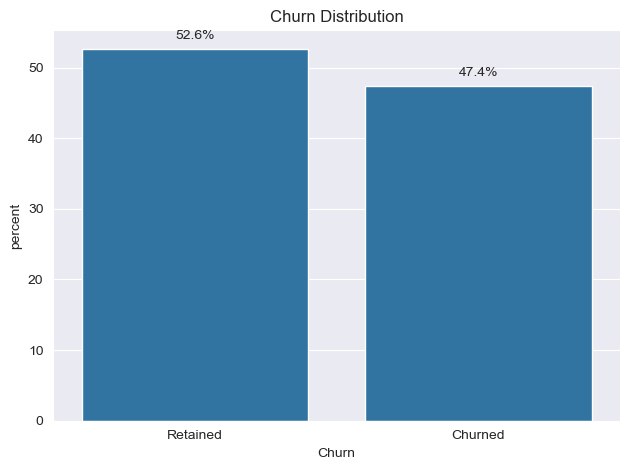

In [288]:
# Explore the target variable

ax = sns.countplot(data=customer_churn_df, x='Churn', stat="percent")

# Add percentage labels on top of each bar
for p in ax.patches:
    percentage = p.get_height()  # This is already the percentage value when using stat="percent"
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., percentage),
                ha='center', 
                va='bottom',
                xytext=(0, 5),  # 5 points vertical offset for better visibility
                textcoords='offset points',
                fontsize=10)
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.title('Churn Distribution')
plt.tight_layout()

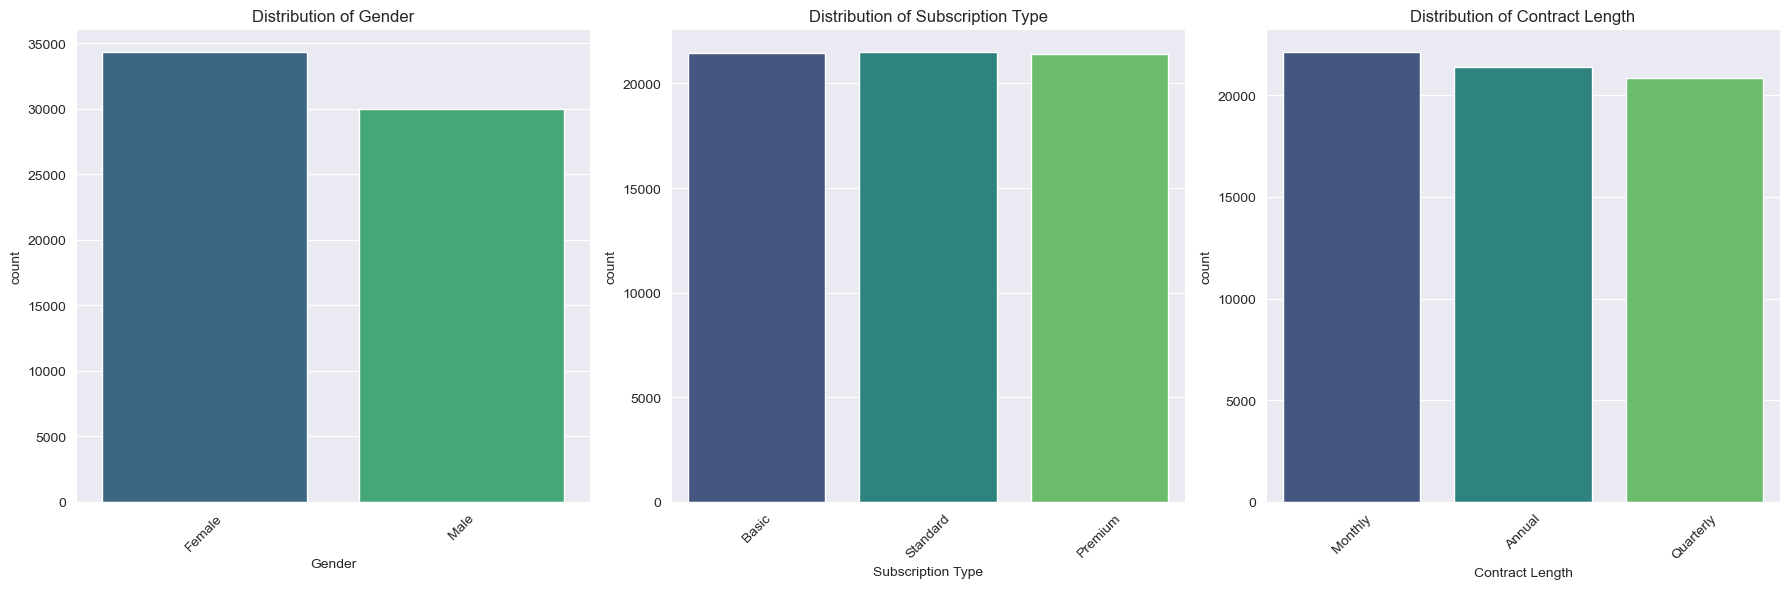

In [331]:
# Let's analyze categorical features
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']

# Create bar plots for categorical features
plt.figure(figsize=(18, 6))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=feature, data=customer_churn_df, palette='viridis')
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()

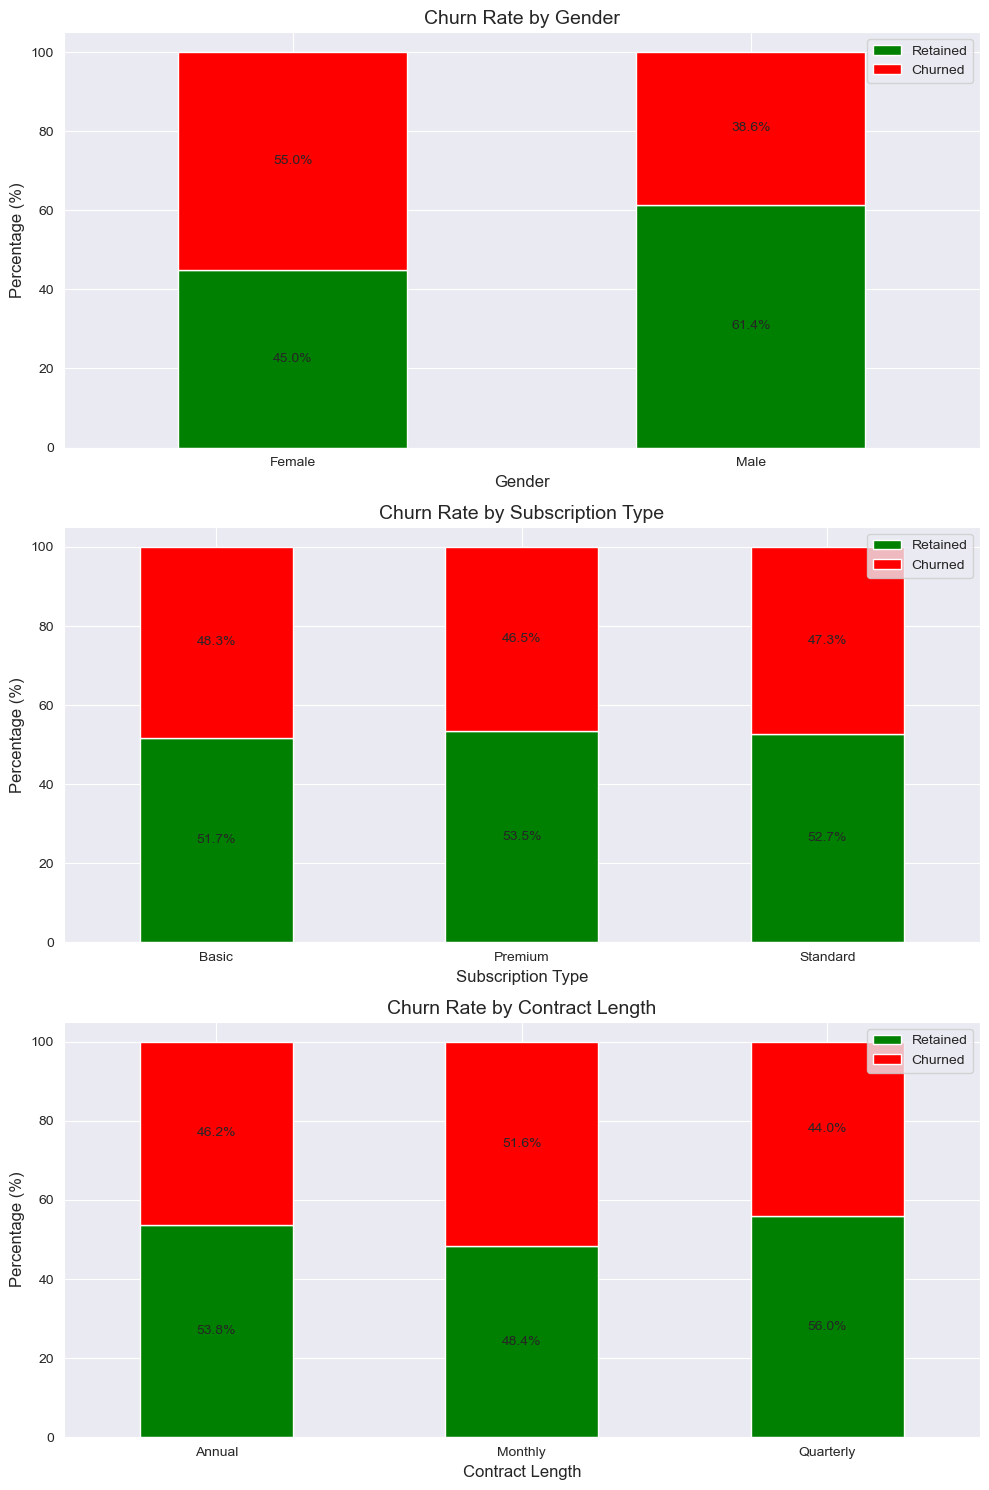

In [290]:
# Examine the relationship between categorical features and churn
plt.figure(figsize=(10, 15))  # Increased height for more vertical space

for i, feature in enumerate(categorical_features):
    plt.subplot(3, 1, i+1)
    
    # Calculate percentages
    churn_pct = customer_churn_df.groupby([feature, 'Churn']).size().unstack()
    churn_pct_normalized = churn_pct.div(churn_pct.sum(axis=1), axis=0) * 100
    
    # Plot
    ax = churn_pct_normalized.plot(kind='bar', stacked=True, 
                                   color=['green', 'red'], ax=plt.gca())
    plt.title(f'Churn Rate by {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(rotation=0)  # Keep labels horizontal
    plt.legend(['Retained', 'Churned'])
    
    # Add percentage annotations
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        if height > 5:  # Only annotate if percentage is significant
            ax.text(x+width/2, y+height/2, f'{height:.1f}%', ha='center', va='center')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Increase vertical space between subplots
plt.tight_layout()
plt.show()

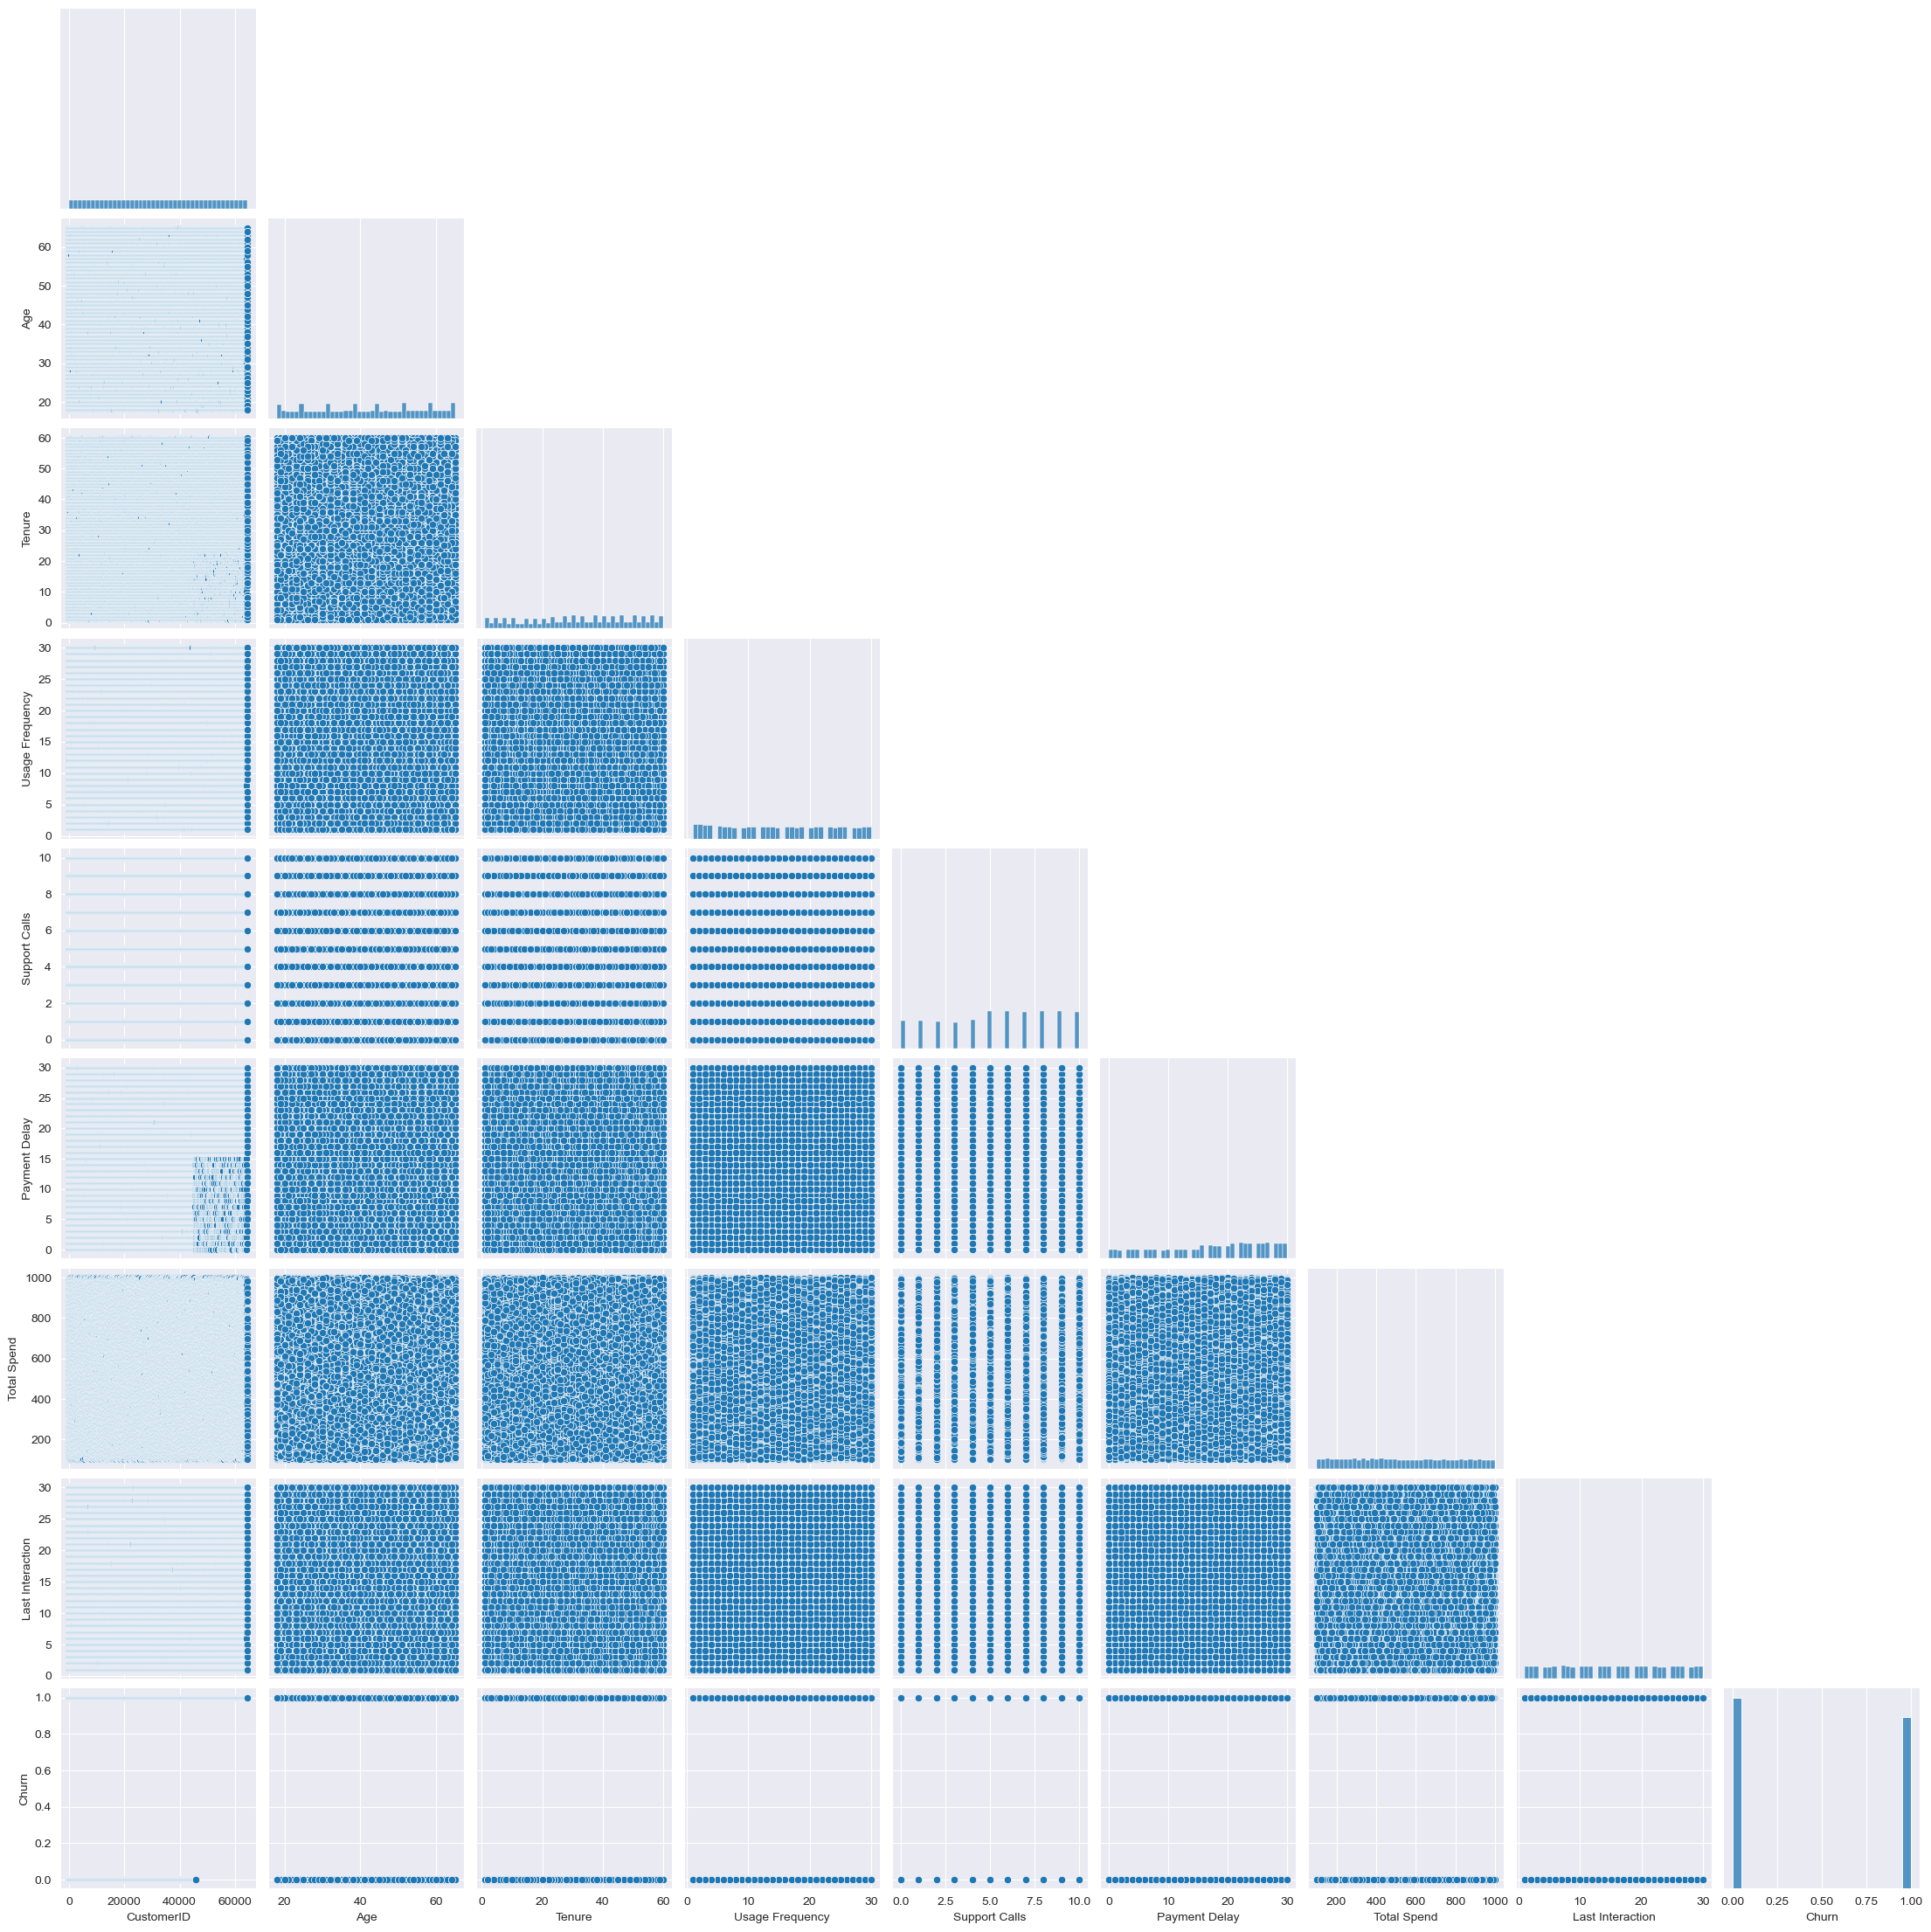

In [202]:
sns.pairplot(customer_churn_df, corner=True);

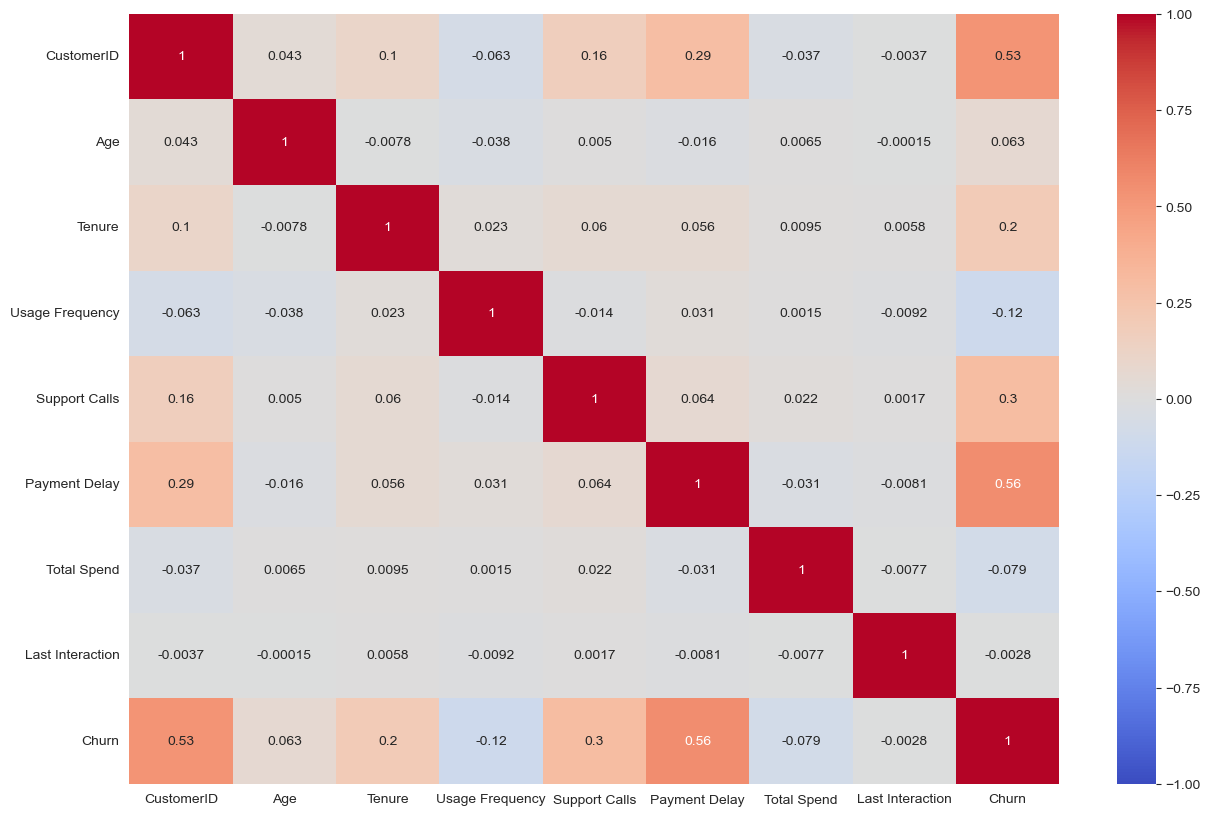

In [203]:
# Create a heatmap to visualize the correlation among numerical features

plt.figure(figsize = (15, 10))

sns.heatmap(customer_churn_df.corr(numeric_only=True), annot = True, vmin=-1, vmax=1, cmap='coolwarm');

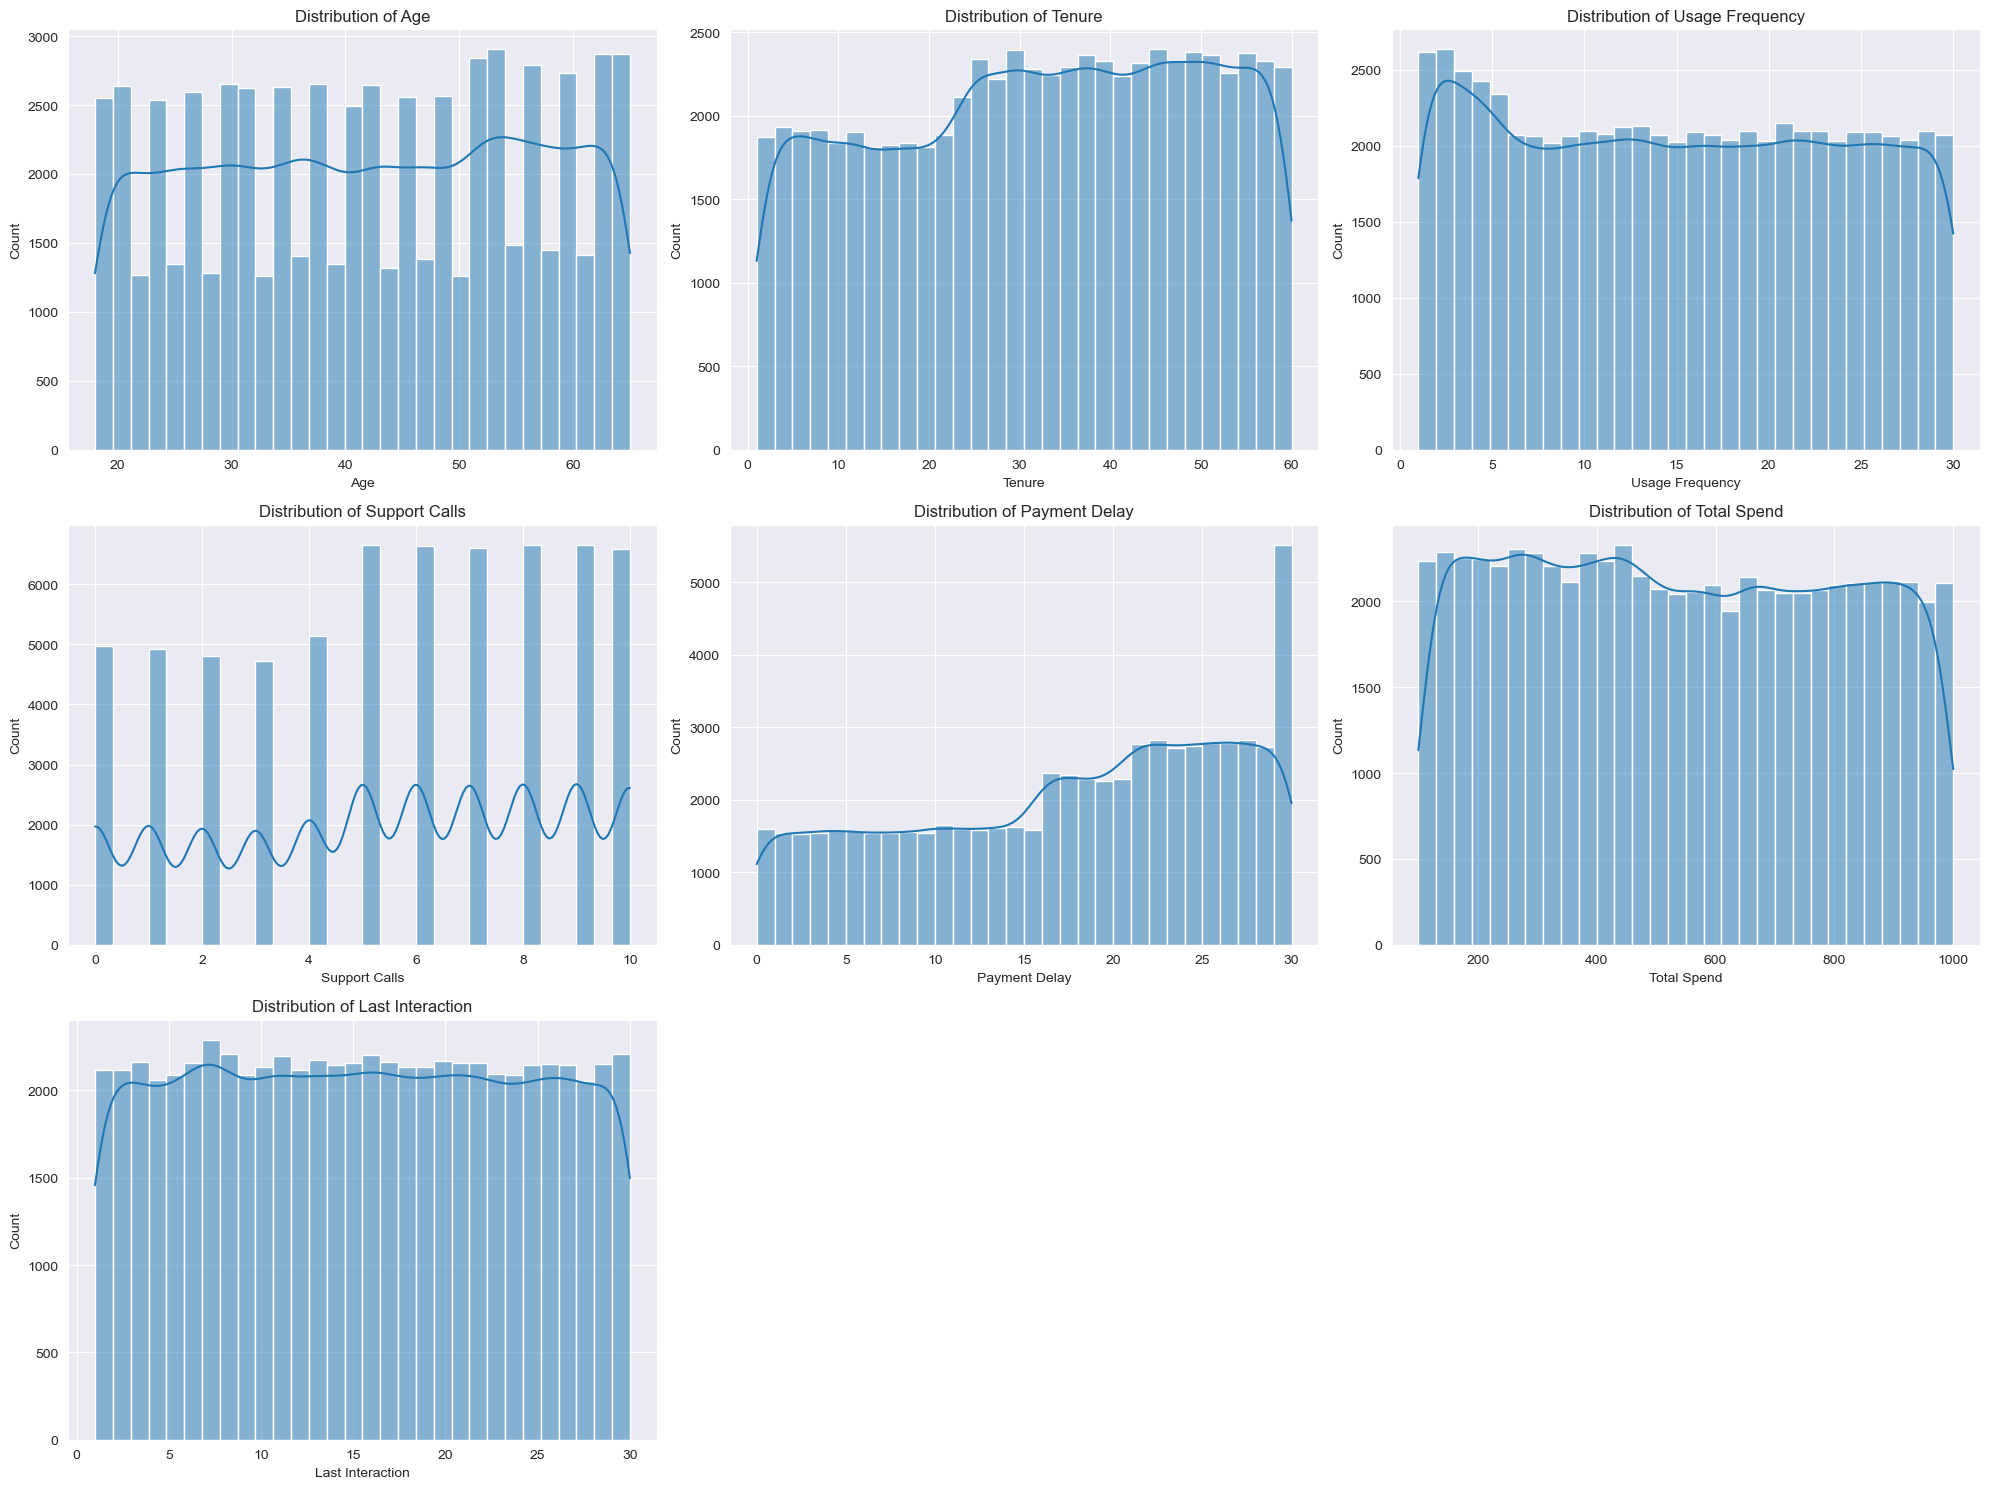

In [333]:
# Create histograms for numerical features
numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
                      'Payment Delay', 'Total Spend', 'Last Interaction']
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(customer_churn_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}', fontsize=12)
plt.tight_layout()

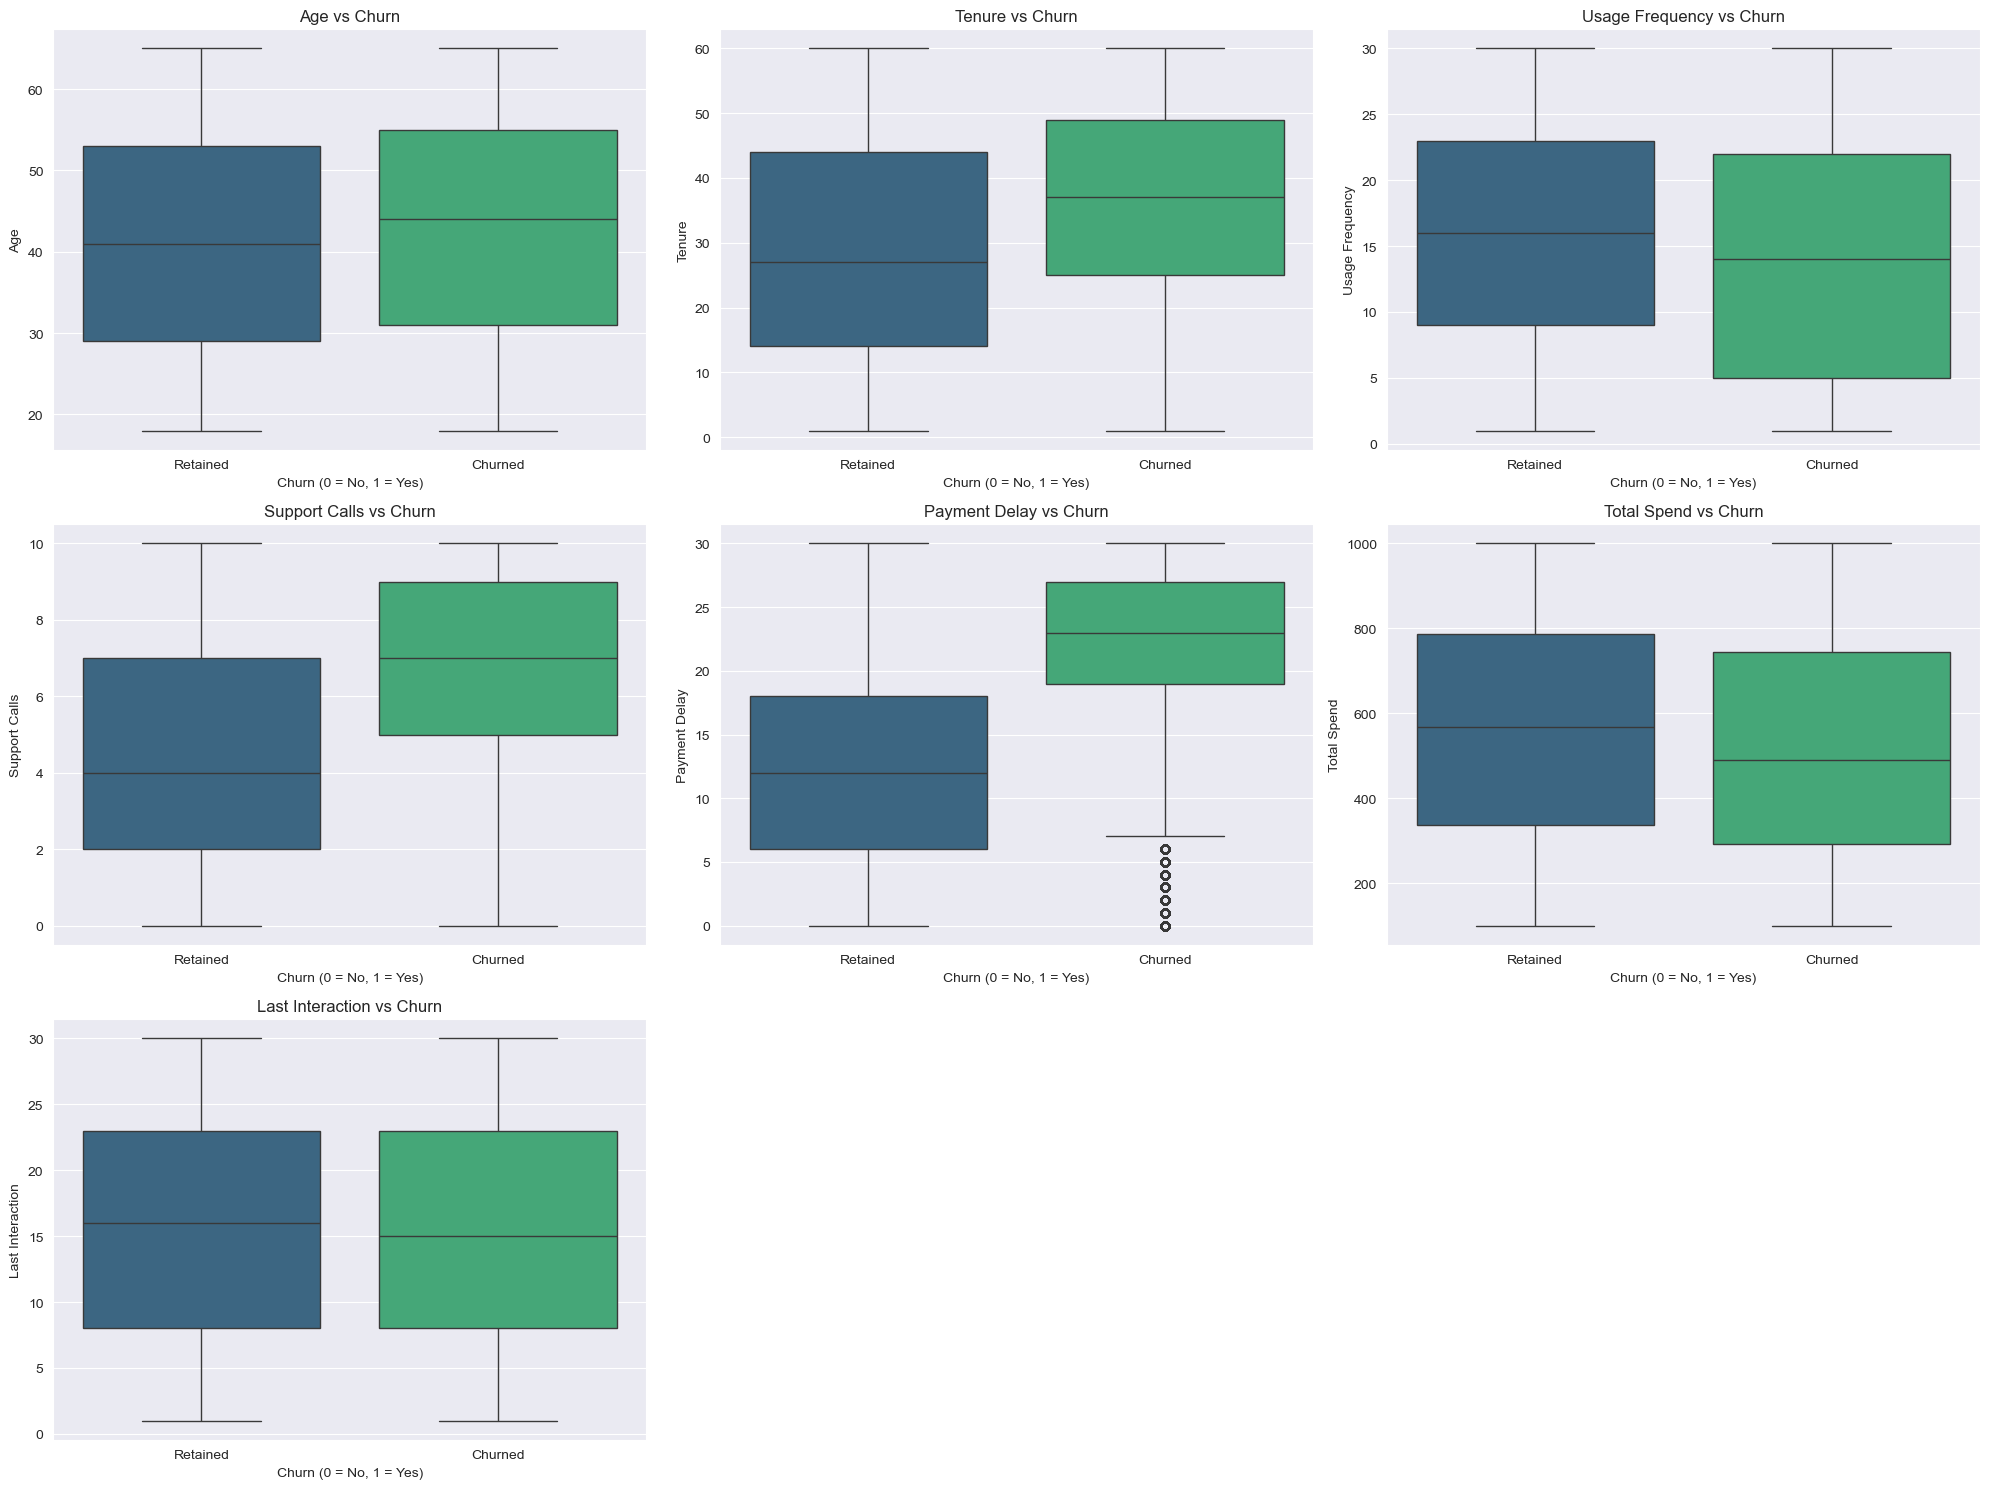

In [296]:
# Examine the relationship between numerical features and churn
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Churn', y=feature, data=customer_churn_df, palette='viridis')
    plt.title(f'{feature} vs Churn', fontsize=12)
    plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=10)
    plt.ylabel(feature, fontsize=10)
    plt.xticks([0, 1], ['Retained', 'Churned'])
plt.tight_layout()

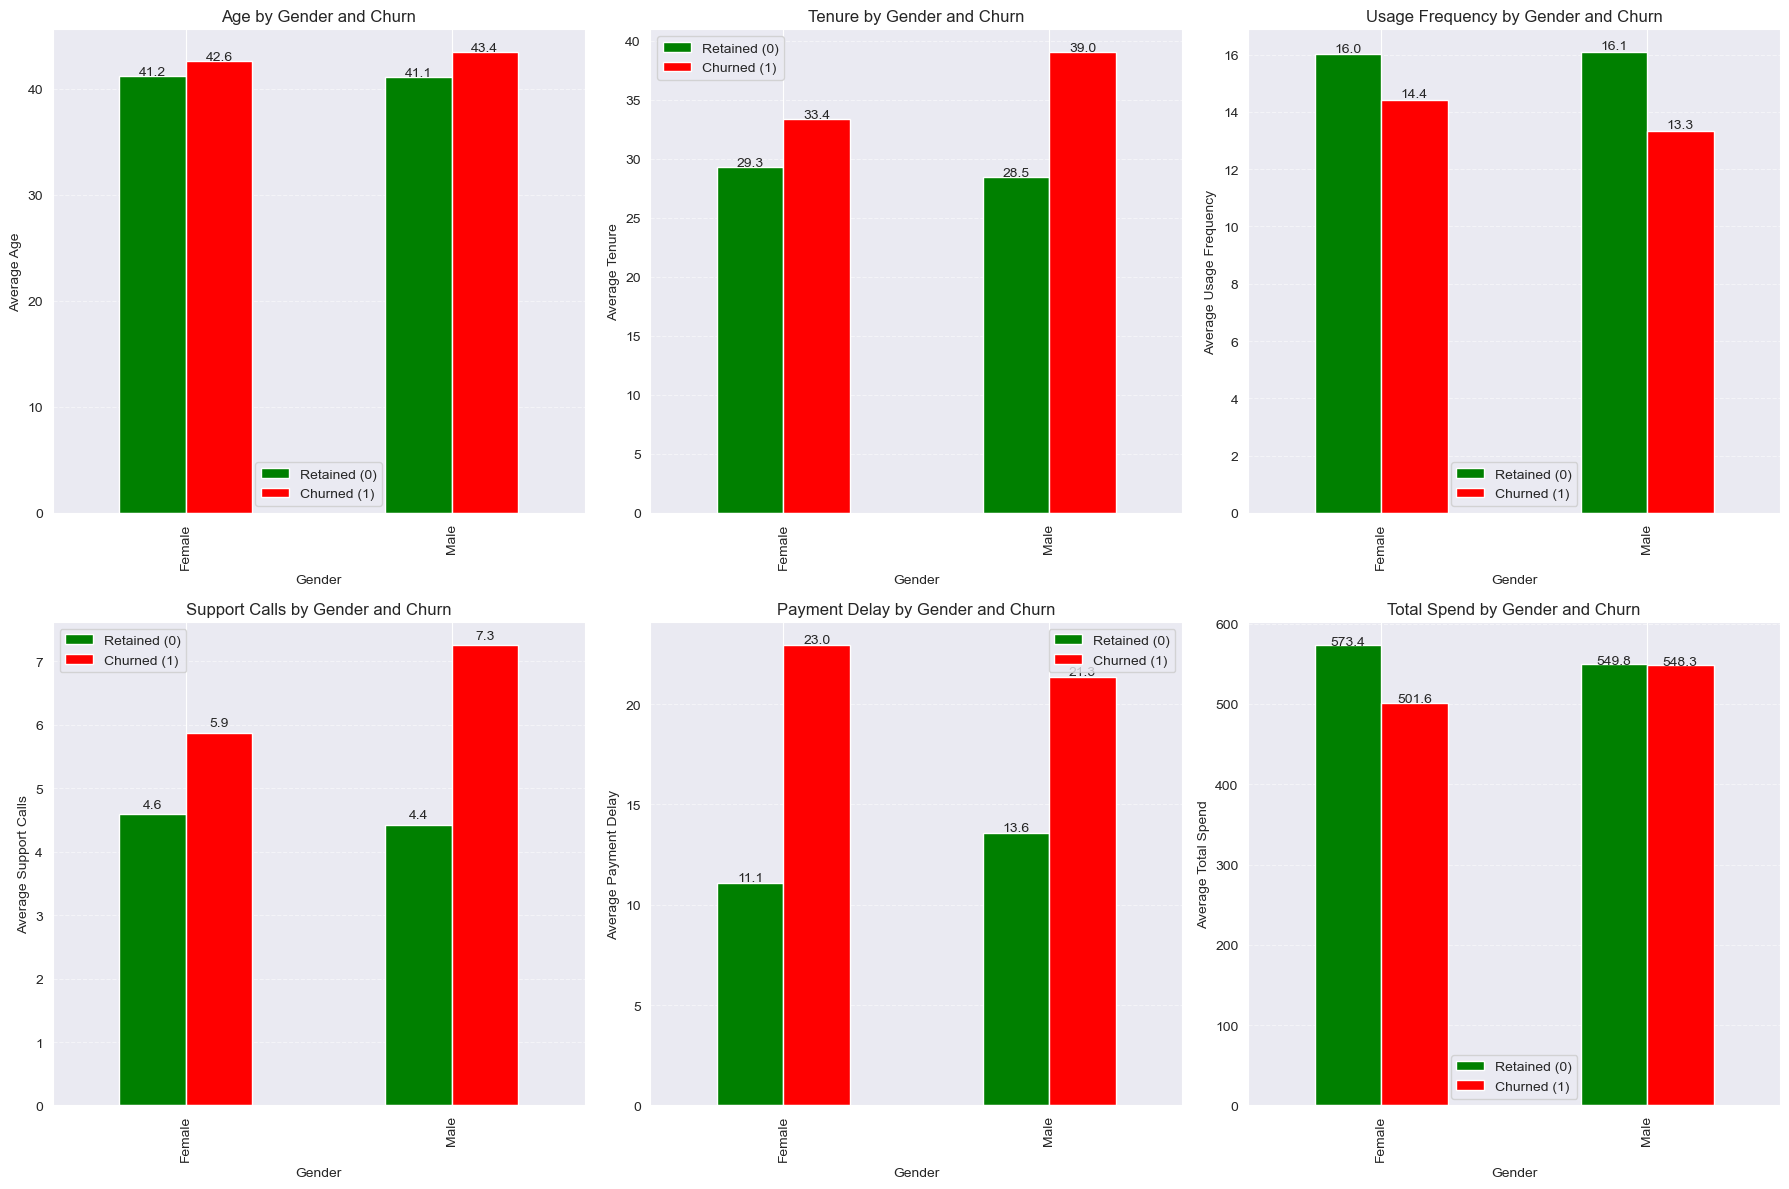

In [292]:
# Visualize gender interactions with multiple features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend']

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    
    # Calculate average feature values by gender and churn
    gender_feature = customer_churn_df.groupby(['Gender', 'Churn'])[feature].mean().unstack()
    
    # Plot
    gender_feature.plot(kind='bar', ax=axes[row, col], color=['green', 'red'])
    axes[row, col].set_title(f'{feature} by Gender and Churn', fontsize=12)
    axes[row, col].set_xlabel('Gender', fontsize=10)
    axes[row, col].set_ylabel(f'Average {feature}', fontsize=10)
    axes[row, col].legend(['Retained (0)', 'Churned (1)'])
    axes[row, col].grid(axis='y', linestyle='--', alpha=0.5)
    
    # Add value labels
    for p in axes[row, col].patches:
        height = p.get_height()
        axes[row, col].text(
            p.get_x() + p.get_width()/2.,
            height + 0.1,
            f'{height:.1f}',
            ha='center'
        )

plt.tight_layout()

# Step 3: Data Preparation for Classification Models

1. Feature Engineering
2. Encode the categorical features 
3. Scale the numerical features
4. Split the data into features and target
5. Split the data into training and test sets

In [298]:
# Feature Engineering
customer_churn_df['Support Call Rate'] = customer_churn_df['Support Calls'] / customer_churn_df['Tenure']
customer_churn_df['Avg Monthly Spend'] = customer_churn_df['Total Spend'] / customer_churn_df['Tenure']
customer_churn_df['Recent Activity'] = customer_churn_df['Tenure'] - customer_churn_df['Last Interaction']

In [300]:
customer_churn_df_copy = customer_churn_df.copy()


In [302]:
#Dropping the Customer ID column
customer_churn_df.drop('CustomerID', axis=1, inplace=True)

In [304]:
print("\nEngineered Features:")
print(customer_churn_df[['Support Call Rate', 'Avg Monthly Spend', 'Recent Activity']].describe())



Engineered Features:
       Support Call Rate  Avg Monthly Spend  Recent Activity
count       64374.000000       64374.000000     64374.000000
mean            0.372214          38.602260        16.495977
std             0.853217          83.844859        19.111977
min             0.000000           1.683333       -29.000000
25%             0.089286           9.768201         2.000000
50%             0.170213          16.800000        17.000000
75%             0.300000          30.894636        31.000000
max            10.000000         999.000000        59.000000


In [306]:
# Identify categorical and numerical columns
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']
num_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 
            'Total Spend', 'Last Interaction', 'Support Call Rate', 
            'Avg Monthly Spend', 'Recent Activity']

In [308]:
# Split the data into features and target
X = customer_churn_df.drop('Churn', axis=1)
y = customer_churn_df['Churn']

In [310]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)


In [312]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ])

# Step 4: Applying Classification Models with Cross-Validation

1. Train the classifiers on the training sets
2. Test on the test sets
3. Evaluate their performances
4. Compare their performances
5. Choose the best model based on performance metric
6. Model improvement and refinement


In [315]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes':GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [317]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [319]:
# Train and evaluate models using pipelines and cross-validation
results = {}

for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    
    # Train on full training set
    pipeline.fit(X_train, y_train)
    
    # Evaluate on test set
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Store results
    results[name] = {
        'pipeline': pipeline,
        'cv_scores': cv_scores,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_accuracy': test_accuracy,
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    }
    
    # Print results
    print(f"\n{name} Results:")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Results:
Cross-Validation Accuracy: 0.8272 ± 0.0032
Test Accuracy: 0.8268
ROC AUC: 0.9034
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      8471
           1       0.81      0.82      0.82      7623

    accuracy                           0.83     16094
   macro avg       0.83      0.83      0.83     16094
weighted avg       0.83      0.83      0.83     16094


Naive Bayes Results:
Cross-Validation Accuracy: 0.8032 ± 0.0036
Test Accuracy: 0.8015
ROC AUC: 0.8919
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      8471
           1       0.75      0.87      0.81      7623

    accuracy                           0.80     16094
   macro avg       0.81      0.81      0.80     16094
weighted avg       0.81      0.80      0.80     16094


KNN Results:
Cross-Validation Accuracy: 0.9086 ± 0.0016
Test Accuracy: 0.9099
ROC AUC: 0.9670
              precision    recall  f1

In [320]:
# Find best model based on cross-validation score
best_model_name = max(results, key=lambda x: results[x]['auc'])
best_model = results[best_model_name]['pipeline']
print(f"\nBest Model: {best_model_name}")
print(f"CV Accuracy: {results[best_model_name]['cv_mean']:.4f}")
print(f"Test Accuracy: {results[best_model_name]['test_accuracy']:.4f}")
print(f"ROC AUC: {results[best_model_name]['auc']:.4f}")


Best Model: Random Forest
CV Accuracy: 0.9970
Test Accuracy: 0.9958
ROC AUC: 0.9999


Text(0.5, 1.02, 'Confusion Matrices for All Models')

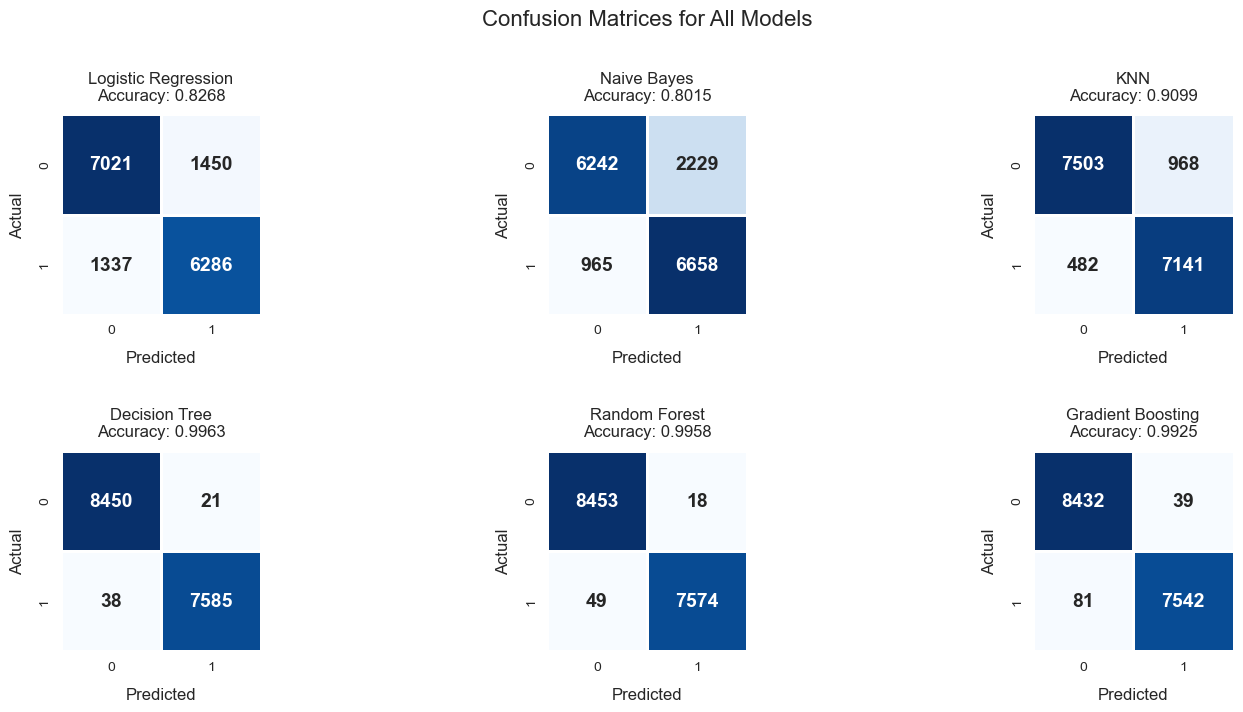

In [329]:
# Plot confusion matrices for all models with improved aesthetics
plt.figure(figsize=(15, 10))  # Larger figure size for better spacing

# Custom color map for better visual appeal
custom_cmap = sns.color_palette("Blues", as_cmap=True)

for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(3, 3, i)
    cm = result['confusion_matrix']
    
    # Calculate metrics from confusion matrix for the plot title
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # Create normalized confusion matrix for better visualization
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot with improved aesthetics
    sns.heatmap(
        cm, 
        annot=True,
        fmt='d',
        cmap=custom_cmap,
        cbar=False,
        linewidths=1,
        linecolor='white',
        annot_kws={"size": 14, "weight": "bold"},
        square=True  # Makes cells square for better proportions
    )
    
    # Improved title and labels with better font styling
    plt.title(f'{name}\nAccuracy: {accuracy:.4f}', fontsize=12, pad=10)
    plt.ylabel('Actual', fontsize=12, labelpad=10)
    plt.xlabel('Predicted', fontsize=12, labelpad=10)
    
    # Optional: Add a border around each subplot
    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)

# Add space between subplots
plt.tight_layout(pad=3.0)

# Add a main title for the entire figure
plt.suptitle('Confusion Matrices for All Models', fontsize=16, y=1.02)



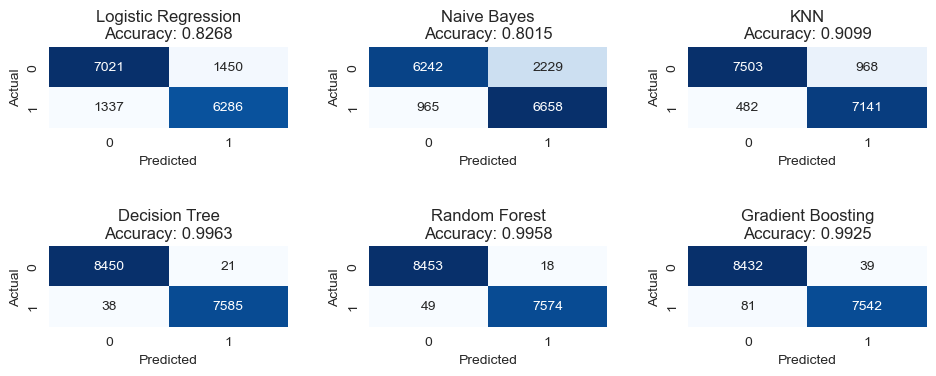

In [335]:
# Plot confusion matrices for all models
plt.figure(figsize=(10, 6))

for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(3, 3, i)
    cm = result['confusion_matrix']
    
    # Calculate metrics from confusion matrix for the plot title
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # Create normalized confusion matrix for better visualization
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name}\nAccuracy: {accuracy:.4f}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plt.tight_layout(pad=3.0)

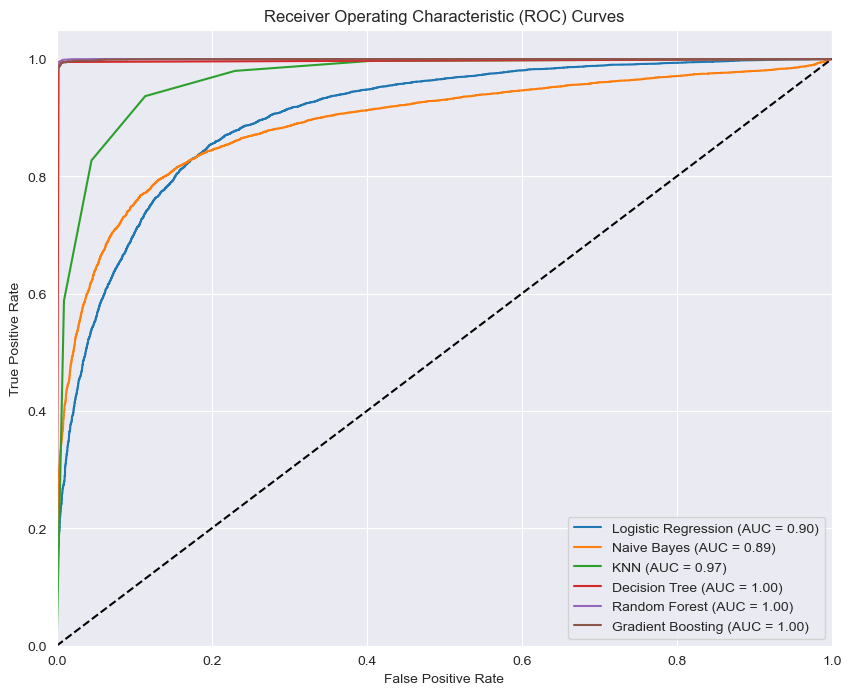

In [336]:
# Plot ROC curve for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    plt.plot(result['fpr'], result['tpr'], 
             label=f'{name} (AUC = {result["auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right");


Feature Importance:
Payment Delay              0.432565
Support Calls              0.090560
Usage Frequency            0.085840
Gender_Male                0.080490
Support Call Rate          0.073816
Tenure                     0.058332
Avg Monthly Spend          0.039445
Age                        0.037044
Total Spend                0.036785
Contract Length_Monthly    0.026848
dtype: float64


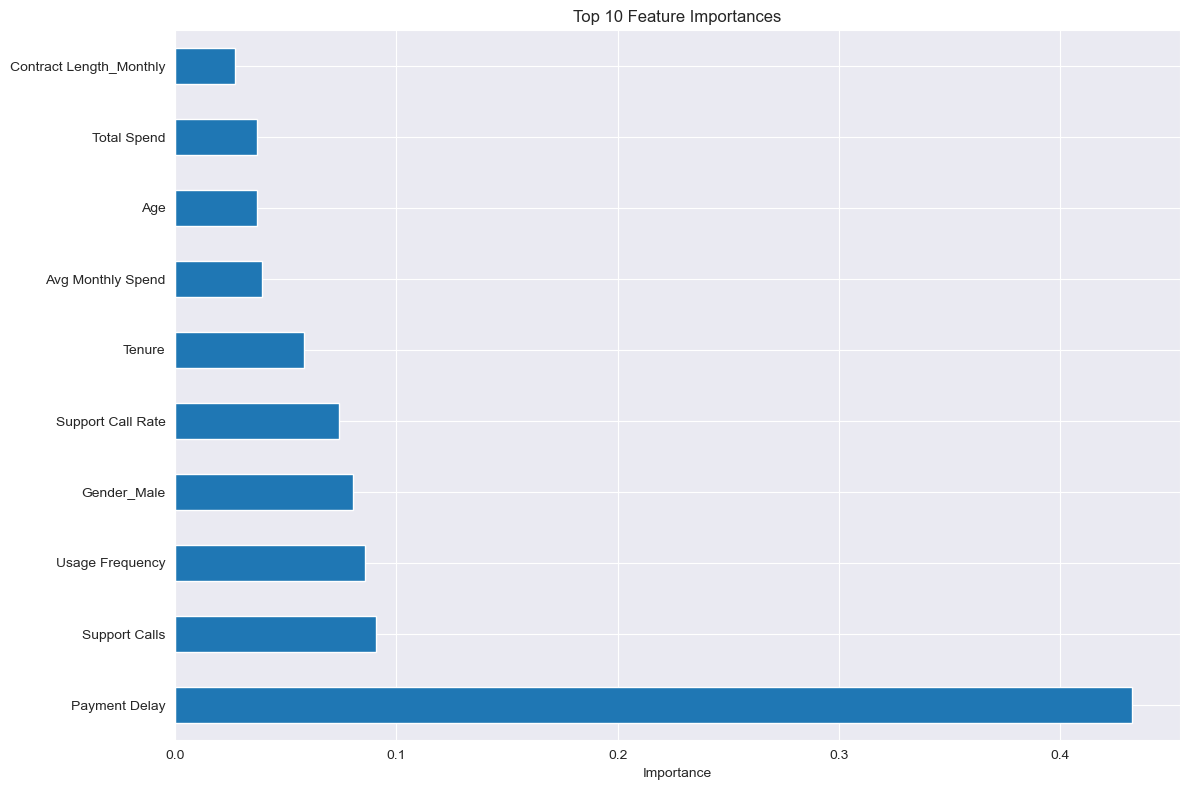

In [339]:
# Feature importance for tree-based models
if hasattr(best_model[-1], 'feature_importances_'):
    # Get feature names after preprocessing
    cat_feature_names = []
    
    # Get categorical feature names after one-hot encoding
    for i, col in enumerate(cat_cols):
        categories = best_model.named_steps['preprocessor'].transformers_[1][1].categories_[i][1:]
        cat_feature_names.extend([f"{col}_{cat}" for cat in categories])
    
    feature_names = num_cols + cat_feature_names
    
    # Get feature importances
    importances = best_model[-1].feature_importances_
    
    # Create Series for easier manipulation
    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    
    # Print top 10 features
    print("\nFeature Importance:")
    print(feat_imp.head(10))
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    feat_imp.head(10).plot(kind='barh')
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Importance')
    plt.tight_layout()

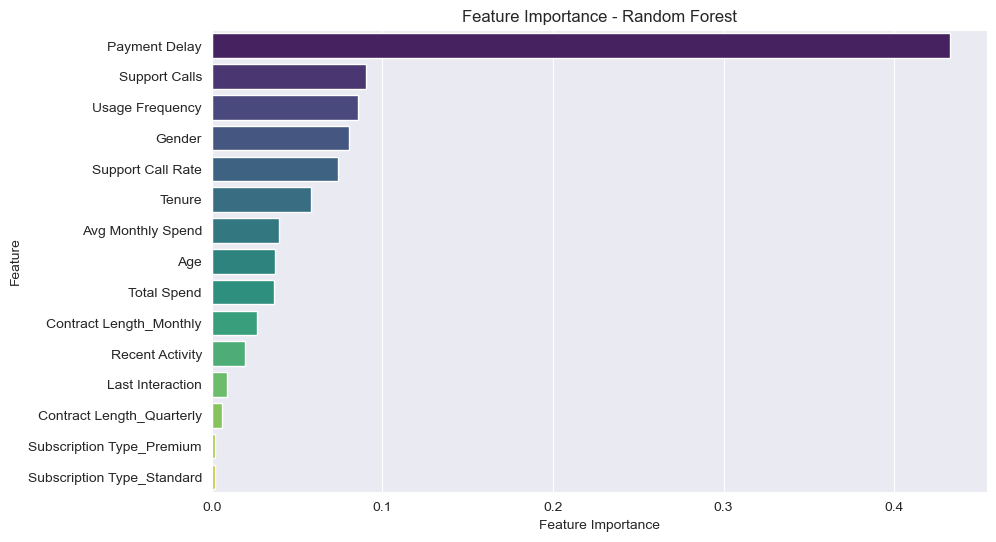

In [341]:
#Feature Importance Plot (using the best Random Forest model)

best_model_rf = results['Random Forest']['pipeline'].named_steps['classifier']
feature_importances = best_model_rf.feature_importances_

# Get feature names after preprocessing
num_feature_names = num_cols
cat_feature_names = results['Random Forest']['pipeline'].named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_cols)
feature_names = np.concatenate((num_feature_names, cat_feature_names))

# Rename 'Gender_Male' to 'Gender'
feature_names = ['Gender' if name == 'Gender_Male' else name for name in feature_names]

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()

In [347]:
import pandas as pd

# Create a DataFrame to compare model performance
comparison_table = pd.DataFrame({
    'Model': list(results.keys()),
    'CV Mean Accuracy': [results[name]['cv_mean'] for name in results],
    'CV Std': [results[name]['cv_std'] for name in results],
    'Test Accuracy': [results[name]['test_accuracy'] for name in results],
    'ROC AUC': [results[name]['auc'] for name in results],
    'Precision': [results[name]['classification_report']['1']['precision'] for name in results],
    'Recall': [results[name]['classification_report']['1']['recall'] for name in results],
    'F1-Score': [results[name]['classification_report']['1']['f1-score'] for name in results]
})

# Sort by test accuracy (descending) and reset index
comparison_table = comparison_table.sort_values('ROC AUC', ascending=False).reset_index(drop=True)

# Format the numbers for better display
comparison_table.style.format({
    'CV Mean Accuracy': '{:.4f}',
    'CV Std': '{:.4f}',
    'Test Accuracy': '{:.4f}',
    'ROC AUC': '{:.4f}',
    'Precision (Class 1)': '{:.4f}',
    'Recall (Class 1)': '{:.4f}',
    'F1-Score (Class 1)': '{:.4f}'
})

# Display the comparison table
print("Model Comparison Table:")
display(comparison_table)

# Optional: Save to CSV
comparison_table.to_csv('model_comparison.csv', index=False)

Model Comparison Table:


,Model,CV Mean Accuracy,CV Std,Test Accuracy,ROC AUC,Precision,Recall,F1-Score
0,Random Forest,0.997002,0.000435,0.995837,0.999941,0.997629,0.993572,0.995596
1,Gradient Boosting,0.994066,0.000502,0.992544,0.999670,0.994856,0.989374,0.992107
2,Decision Tree,0.997033,0.000464,0.996334,0.996268,0.997239,0.995015,0.996126
3,KNN,0.908597,0.001603,0.909904,0.966956,0.880626,0.936770,0.907831
4,Logistic Regression,0.827244,0.003235,0.826830,0.903386,0.812565,0.824610,0.818543
5,Naive Bayes,0.803181,0.003582,0.801541,0.891945,0.749184,0.873409,0.806541


## Deep Neural Network (GraphSAGE)

In [214]:
import networkx as nx
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from torch_geometric.data import Data
import torch_geometric.transforms as T


In [216]:
# Create customer graph
G = nx.Graph()

In [218]:
# Add nodes with features
for idx, row in customer_churn_df_copy.iterrows():
    G.add_node(row['CustomerID'], 
                age=row['Age'],
                gender=1 if row['Gender']=='Female' else 0,
                tenure=row['Tenure'],
                usage=row['Usage Frequency'],
                support_calls=row['Support Calls'],
                payment_delay=row['Payment Delay'],
                subscription=row['Subscription Type'],
                contract_length=row['Contract Length'],
                total_spend=row['Total Spend'],
                last_interaction=row['Last Interaction'],
                support_call_rate=row['Support Call Rate'],
                avg_monthly_spend=row['Avg Monthly Spend'],
                recent_activity=row['Recent Activity'],
                churn=row['Churn'])

In [221]:
from sklearn.neighbors import BallTree

# Convert relevant numeric features into a NumPy array
numeric_features = customer_churn_df_copy[['Age', 'Tenure', 'Usage Frequency']].to_numpy()

# Build BallTree for fast nearest neighbor search
tree = BallTree(numeric_features, metric='manhattan')  # Manhattan distance suits discrete ranges

# Query BallTree for nearest neighbors (restrict to k closest matches)
k_neighbors = min(50, len(customer_churn_df_copy))  # Avoid excessive searches
distances, indices = tree.query(numeric_features, k=k_neighbors)

# Add edges based on similarity conditions
for i, neighbors in enumerate(indices):
    customer_i = customer_churn_df_copy.iloc[i]
    
    for j in neighbors[1:]:  # Skip the first (it's the same customer)
        customer_j = customer_churn_df_copy.iloc[j]
        
        # Compute similarity score based on original conditions
        similarity_score = 0
        
        if abs(customer_i['Age'] - customer_j['Age']) <= 5:
            similarity_score += 1
            
        if customer_i['Gender'] == customer_j['Gender']:
            similarity_score += 1
            
        if abs(customer_i['Tenure'] - customer_j['Tenure']) <= 5:
            similarity_score += 1
            
        if abs(customer_i['Usage Frequency'] - customer_j['Usage Frequency']) <= 5:
            similarity_score += 1
            
        if customer_i['Subscription Type'] == customer_j['Subscription Type']:
            similarity_score += 1
            
        # Only add edge if similarity score is 3 or more
        if similarity_score >= 3:
            G.add_edge(customer_i['CustomerID'], customer_j['CustomerID'], weight=similarity_score)

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Graph created with 64374 nodes and 1818847 edges


In [222]:
# Prepare features for PyTorch Geometric
feature_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
                    'Payment Delay', 'Total Spend', 'Last Interaction',
                    'Support Call Rate', 'Avg Monthly Spend', 'Recent Activity']
    
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']

In [223]:
# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')
    
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, feature_cols),
        ('cat', categorical_transformer, categorical_cols)
        ])

In [227]:
# Transform features
X = preprocessor.fit_transform(customer_churn_df_copy[feature_cols + categorical_cols])
y = customer_churn_df_copy['Churn'].values

In [229]:

# Create a fast mapping from node ID to index
node_to_index = {node: idx for idx, node in enumerate(G.nodes())}

# Convert edges to index format efficiently
num_edges = len(G.edges())
edge_index = np.zeros((2, 2 * num_edges), dtype=np.int64)  # Pre-allocate space

i = 0
for u, v in G.edges():
    edge_index[:, i] = [node_to_index[u], node_to_index[v]]  # Forward edge
    edge_index[:, i + 1] = [node_to_index[v], node_to_index[u]]  # Reverse edge
    i += 2  # Move to the next index

print(f"Edge index shape: {edge_index.shape}")  # Should be (2, 2 * num_edges)

# Convert to PyTorch tensor
edge_index = torch.tensor(edge_index, dtype=torch.long)

# Ensure correct shape (2, num_edges)
print(f"Final edge_index shape: {edge_index.shape}")  # Should be (2, 2 * num_edges)

Edge index shape: (2, 3637694)
Final edge_index shape: torch.Size([2, 3637694])


In [230]:
# Convert features to PyTorch tensor
x = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)

In [231]:
# Create PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, y=y)

In [232]:
# Split data
node_indices = torch.arange(data.num_nodes)
train_idx, test_idx = train_test_split(node_indices, test_size=0.2, random_state=42, stratify=y)
train_idx, val_idx = train_test_split(train_idx, test_size=0.25, random_state=42, stratify=y[train_idx])

In [233]:
data.train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
data.val_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
data.test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)

In [234]:
data.train_mask[train_idx] = True
data.val_mask[val_idx] = True
data.test_mask[test_idx] = True

In [235]:
# MODELING
# Define the GraphSAGE model
class GraphSAGE(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(input_dim, hidden_dim)
        self.conv2 = SAGEConv(hidden_dim, hidden_dim)
        self.conv3 = SAGEConv(hidden_dim, hidden_dim)
        self.lin = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        
        x = self.lin(x)
        return F.log_softmax(x, dim=1)

In [236]:
# Training the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device)
input_dim = data.num_features
hidden_dim = 64
output_dim = 2  # Binary classification (churn or not)
model = GraphSAGE(input_dim, hidden_dim, output_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

In [237]:
# For handling class imbalance
weights = torch.tensor([1.0, 5.0]).to(device)  # Higher weight for minority class (churn)
criterion = torch.nn.NLLLoss(weight=weights)


Epoch 0, Train Loss: 0.6508, Train Acc: 0.4737, Val Loss: 0.5095, Val Acc: 0.4737, Test Acc: 0.4737
Epoch 10, Train Loss: 0.3705, Train Acc: 0.4737, Val Loss: 0.3223, Val Acc: 0.4737, Test Acc: 0.4737
Epoch 20, Train Loss: 0.2932, Train Acc: 0.7140, Val Loss: 0.2601, Val Acc: 0.7159, Test Acc: 0.7143
Epoch 30, Train Loss: 0.2238, Train Acc: 0.8472, Val Loss: 0.1858, Val Acc: 0.8503, Test Acc: 0.8456
Epoch 40, Train Loss: 0.1779, Train Acc: 0.8769, Val Loss: 0.1374, Val Acc: 0.8803, Test Acc: 0.8766
Epoch 50, Train Loss: 0.1497, Train Acc: 0.9055, Val Loss: 0.1125, Val Acc: 0.9093, Test Acc: 0.9061
Epoch 60, Train Loss: 0.1305, Train Acc: 0.9078, Val Loss: 0.0987, Val Acc: 0.9116, Test Acc: 0.9085
Epoch 70, Train Loss: 0.1138, Train Acc: 0.9220, Val Loss: 0.0864, Val Acc: 0.9240, Test Acc: 0.9216
Epoch 80, Train Loss: 0.1029, Train Acc: 0.9361, Val Loss: 0.0745, Val Acc: 0.9362, Test Acc: 0.9348
Epoch 90, Train Loss: 0.0937, Train Acc: 0.9432, Val Loss: 0.0651, Val Acc: 0.9428, Test Acc

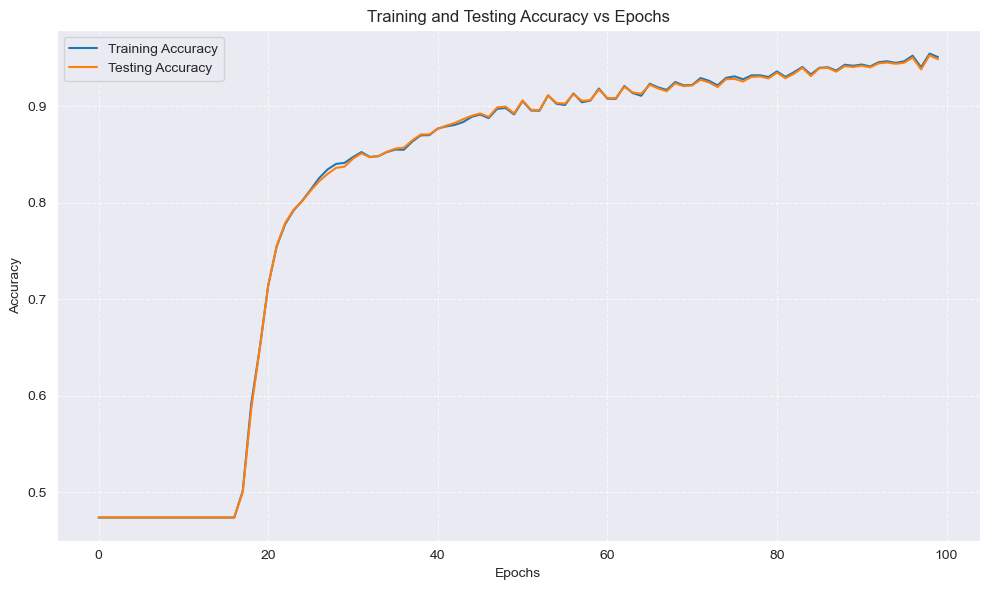

In [238]:
# For tracking metrics
best_val_loss = float('inf')
best_model_state = None
epochs = 100
train_accuracies = []
test_accuracies = []
epoch_numbers = []

for epoch in range(epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    
    # Evaluation phase
    model.eval()
    with torch.no_grad():
        out = model(data)
        val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
        
        # Calculate accuracies
        _, pred = out.max(dim=1)
        train_acc = pred[data.train_mask].eq(data.y[data.train_mask]).sum().item() / data.train_mask.sum().item()
        test_acc = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
        
        # Save metrics for plotting
        epoch_numbers.append(epoch)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
    
    # Save best model based on validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict().copy()
    
    # Print progress
    if epoch % 10 == 0:
        val_acc = pred[data.val_mask].eq(data.y[data.val_mask]).sum().item() / data.val_mask.sum().item()
        print(f'Epoch {epoch}, Train Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss.item():.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}')

# Plot training and testing accuracy vs epochs
plt.figure(figsize=(10, 6))
plt.plot(epoch_numbers, train_accuracies, label='Training Accuracy')
plt.plot(epoch_numbers, test_accuracies, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Epochs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('graphsage_train_test_accuracy.png')


In [239]:
# Load best model
model.load_state_dict(best_model_state)

<All keys matched successfully>


Test Accuracy: 0.9486601941747573

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      6776
           1       0.91      0.99      0.95      6099

    accuracy                           0.95     12875
   macro avg       0.95      0.95      0.95     12875
weighted avg       0.95      0.95      0.95     12875


Confusion Matrix:
[[6150  626]
 [  35 6064]]

ROC AUC Score: 0.9963


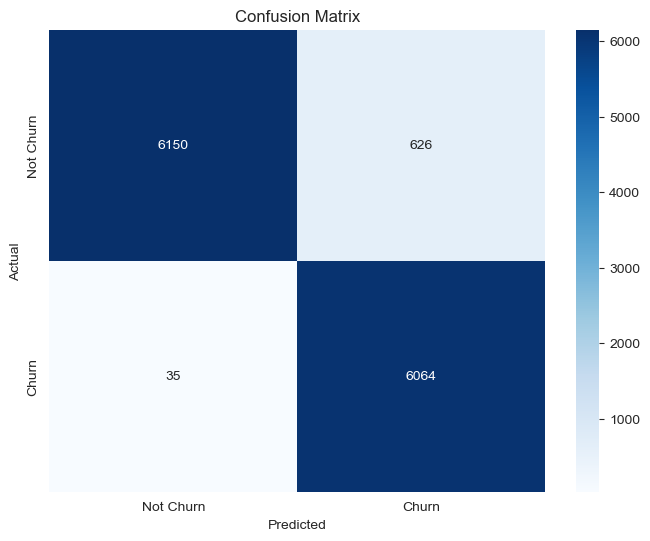

In [242]:
#add library
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Test the model
model.eval()
with torch.no_grad():
    out = model(data)
    _, pred = out.max(dim=1)
    test_acc = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
    
    # Detailed metrics on test set
    y_true = data.y[data.test_mask].cpu().numpy()
    y_pred = pred[data.test_mask].cpu().numpy()
    
    print("\nTest Accuracy:", test_acc)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    
    # ROC AUC Score
    y_scores = torch.exp(out)[data.test_mask][:, 1].cpu().numpy()
    roc_auc = roc_auc_score(y_true, y_scores)
    print(f"\nROC AUC Score: {roc_auc:.4f}")
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig('confusion_matrix.png')


In [244]:
# Save the model
torch.save(model.state_dict(), 'graphsage_churn_model.pth')

In [245]:

# Get node embeddings for analysis
model.eval()
with torch.no_grad():
    x, edge_index = data.x, data.edge_index
    
    x = model.conv1(x, edge_index)
    x = F.relu(x)
    
    x = model.conv2(x, edge_index)
    x = F.relu(x)
    
    x = model.conv3(x, edge_index)
    x = F.relu(x)
    
    embeddings = x.cpu().numpy()

  File "C:\Users\erojo\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\erojo\AppData\Local\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\erojo\AppData\Local\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\erojo\AppData\Local\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


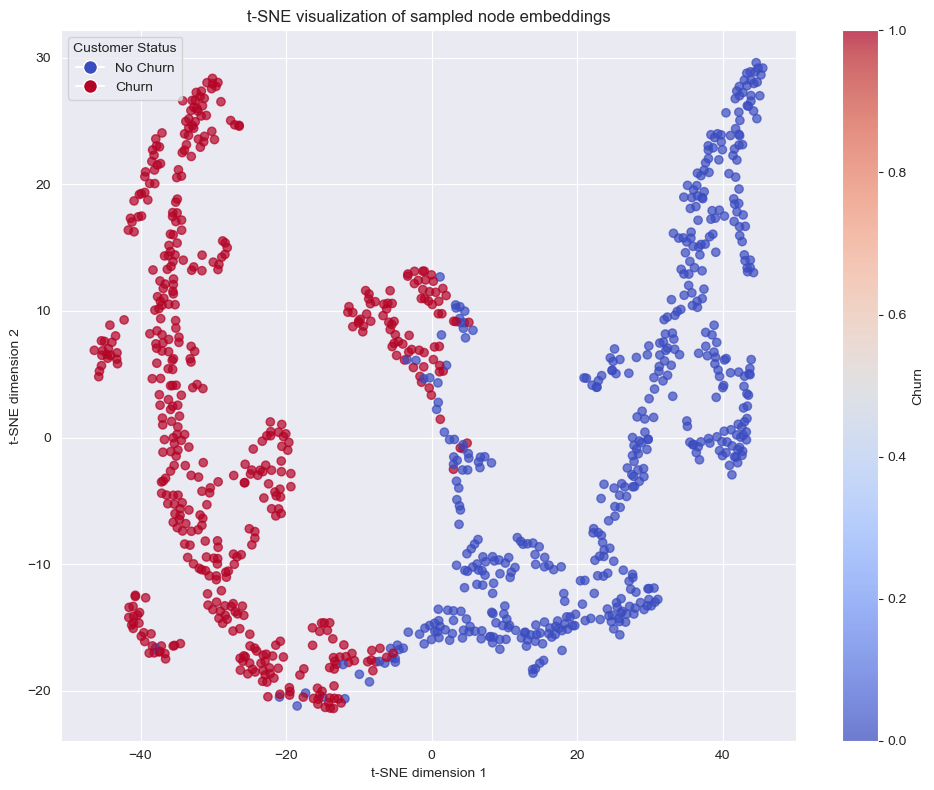

In [246]:
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")
# Randomly sample a subset of nodes
sample_size = 1000  # Adjust this number based on your dataset size
indices = np.random.choice(len(embeddings), size=sample_size, replace=False)
sampled_embeddings = embeddings[indices]
sampled_labels = data.y.cpu().numpy()[indices]

# Initialize and apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
node_embeddings_2d = tsne.fit_transform(sampled_embeddings)

# Plot the sampled embeddings
plt.figure(figsize=(10, 8))
scatter = plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], 
           c=sampled_labels, cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Churn')
plt.title('t-SNE visualization of sampled node embeddings')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')

# Add legend with class labels
classes = ['No Churn', 'Churn']
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                     markerfacecolor=plt.cm.coolwarm(i/1.), markersize=10) 
          for i in [0, 1]]
plt.legend(handles, classes, title='Customer Status')

plt.tight_layout()
plt.savefig('node_embeddings_sampled.png')

In [249]:
# Feature importance based on graph structure
with torch.no_grad():
    out = model(data)
    _, pred = out.max(dim=1)
    
    # Get probabilities
    probs = torch.exp(out)
    churn_probs = probs[:, 1].cpu().numpy()
    
    # Add predictions and probabilities to the dataframe
    customer_churn_df_copy['predicted_churn'] = pred.cpu().numpy()
    customer_churn_df_copy['churn_probability'] = churn_probs

In [252]:
customer_churn_df_copy.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Support Call Rate,Avg Monthly Spend,Recent Activity,predicted_churn,churn_probability
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,0.160000,23.920000,16,1,0.999310
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,0.250000,20.857143,8,0,0.048043
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0,0.074074,28.037037,6,0,0.011601
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0,0.555556,25.777778,-9,0,0.012802
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0,0.155172,9.189655,40,0,0.002612
